# Geometry Selection

This notebook estimates what is the most optimal separation distance between strings in order to maximise the number of events detected per year.

The data analysed was obtained from the simulation 'Sim_10tev_10gev', where an Atmospheric + Astrophysical neutrino flux of muon neutrinos was genereated and weighted to an energy distribution of 10Tev to 100Gev. The simulation was performed to 50m, 60m, 70m, 80m, 90 and 100.

In [1]:
#Import libraries
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
from matplotlib.ticker import MultipleLocator

**Weights**: is a multi-dimensions dictionary with each key being the separation distance of each string. Inside each key there is the minimum number of DOMs required to trigger on an event, set at 5. The last key is the minimum number of PMT hits in a DOM. The value associated to that key is a list of all the event weights that satisfied those conditions

In [2]:
Weights = {}

In [3]:
for i in [50,60,70,80,90,100]:
    dis = i 
    f = open('Weights_'+str(dis)+'.pkl','rb')
    Weights[str(dis)] = pkl.load(f)
    f.close()

Calculation of triggered events (at least 3-pmt its) and triggerable events (at least 5-DOM hits), with their corresponding statistical error.

In [5]:
triggered_events = [sum(Weights[i][5][3]) for i in Weights.keys()]
triggerable_events = [sum(Weights[i][5][1]) for i in Weights.keys()]
triggered_events_var = {}
triggerable_events_var = {}
for i in Weights.keys():
    triggered_events_var[i] = [j**2 for j in Weights[i][5][3]]
    triggerable_events_var[i] = [j**2 for j in Weights[i][5][1]]
for i in Weights.keys():
    triggered_events_var[i] = sum(triggered_events_var[i])
    triggerable_events_var[i] = sum(triggerable_events_var[i])

#triggered_events_var = [i**2 for i in Weights[j][5][3] for j in Weights.keys()]
#tiggerable_events_var = [i**2 for i in Weights[j][5][1] for j in Weights.keys()]
triggered_events_err = [np.sqrt(triggered_events_var[i]) for i in triggered_events_var.keys()]
triggerable_events_err =[np.sqrt(triggerable_events_var[i]) for i in triggerable_events_var.keys()]

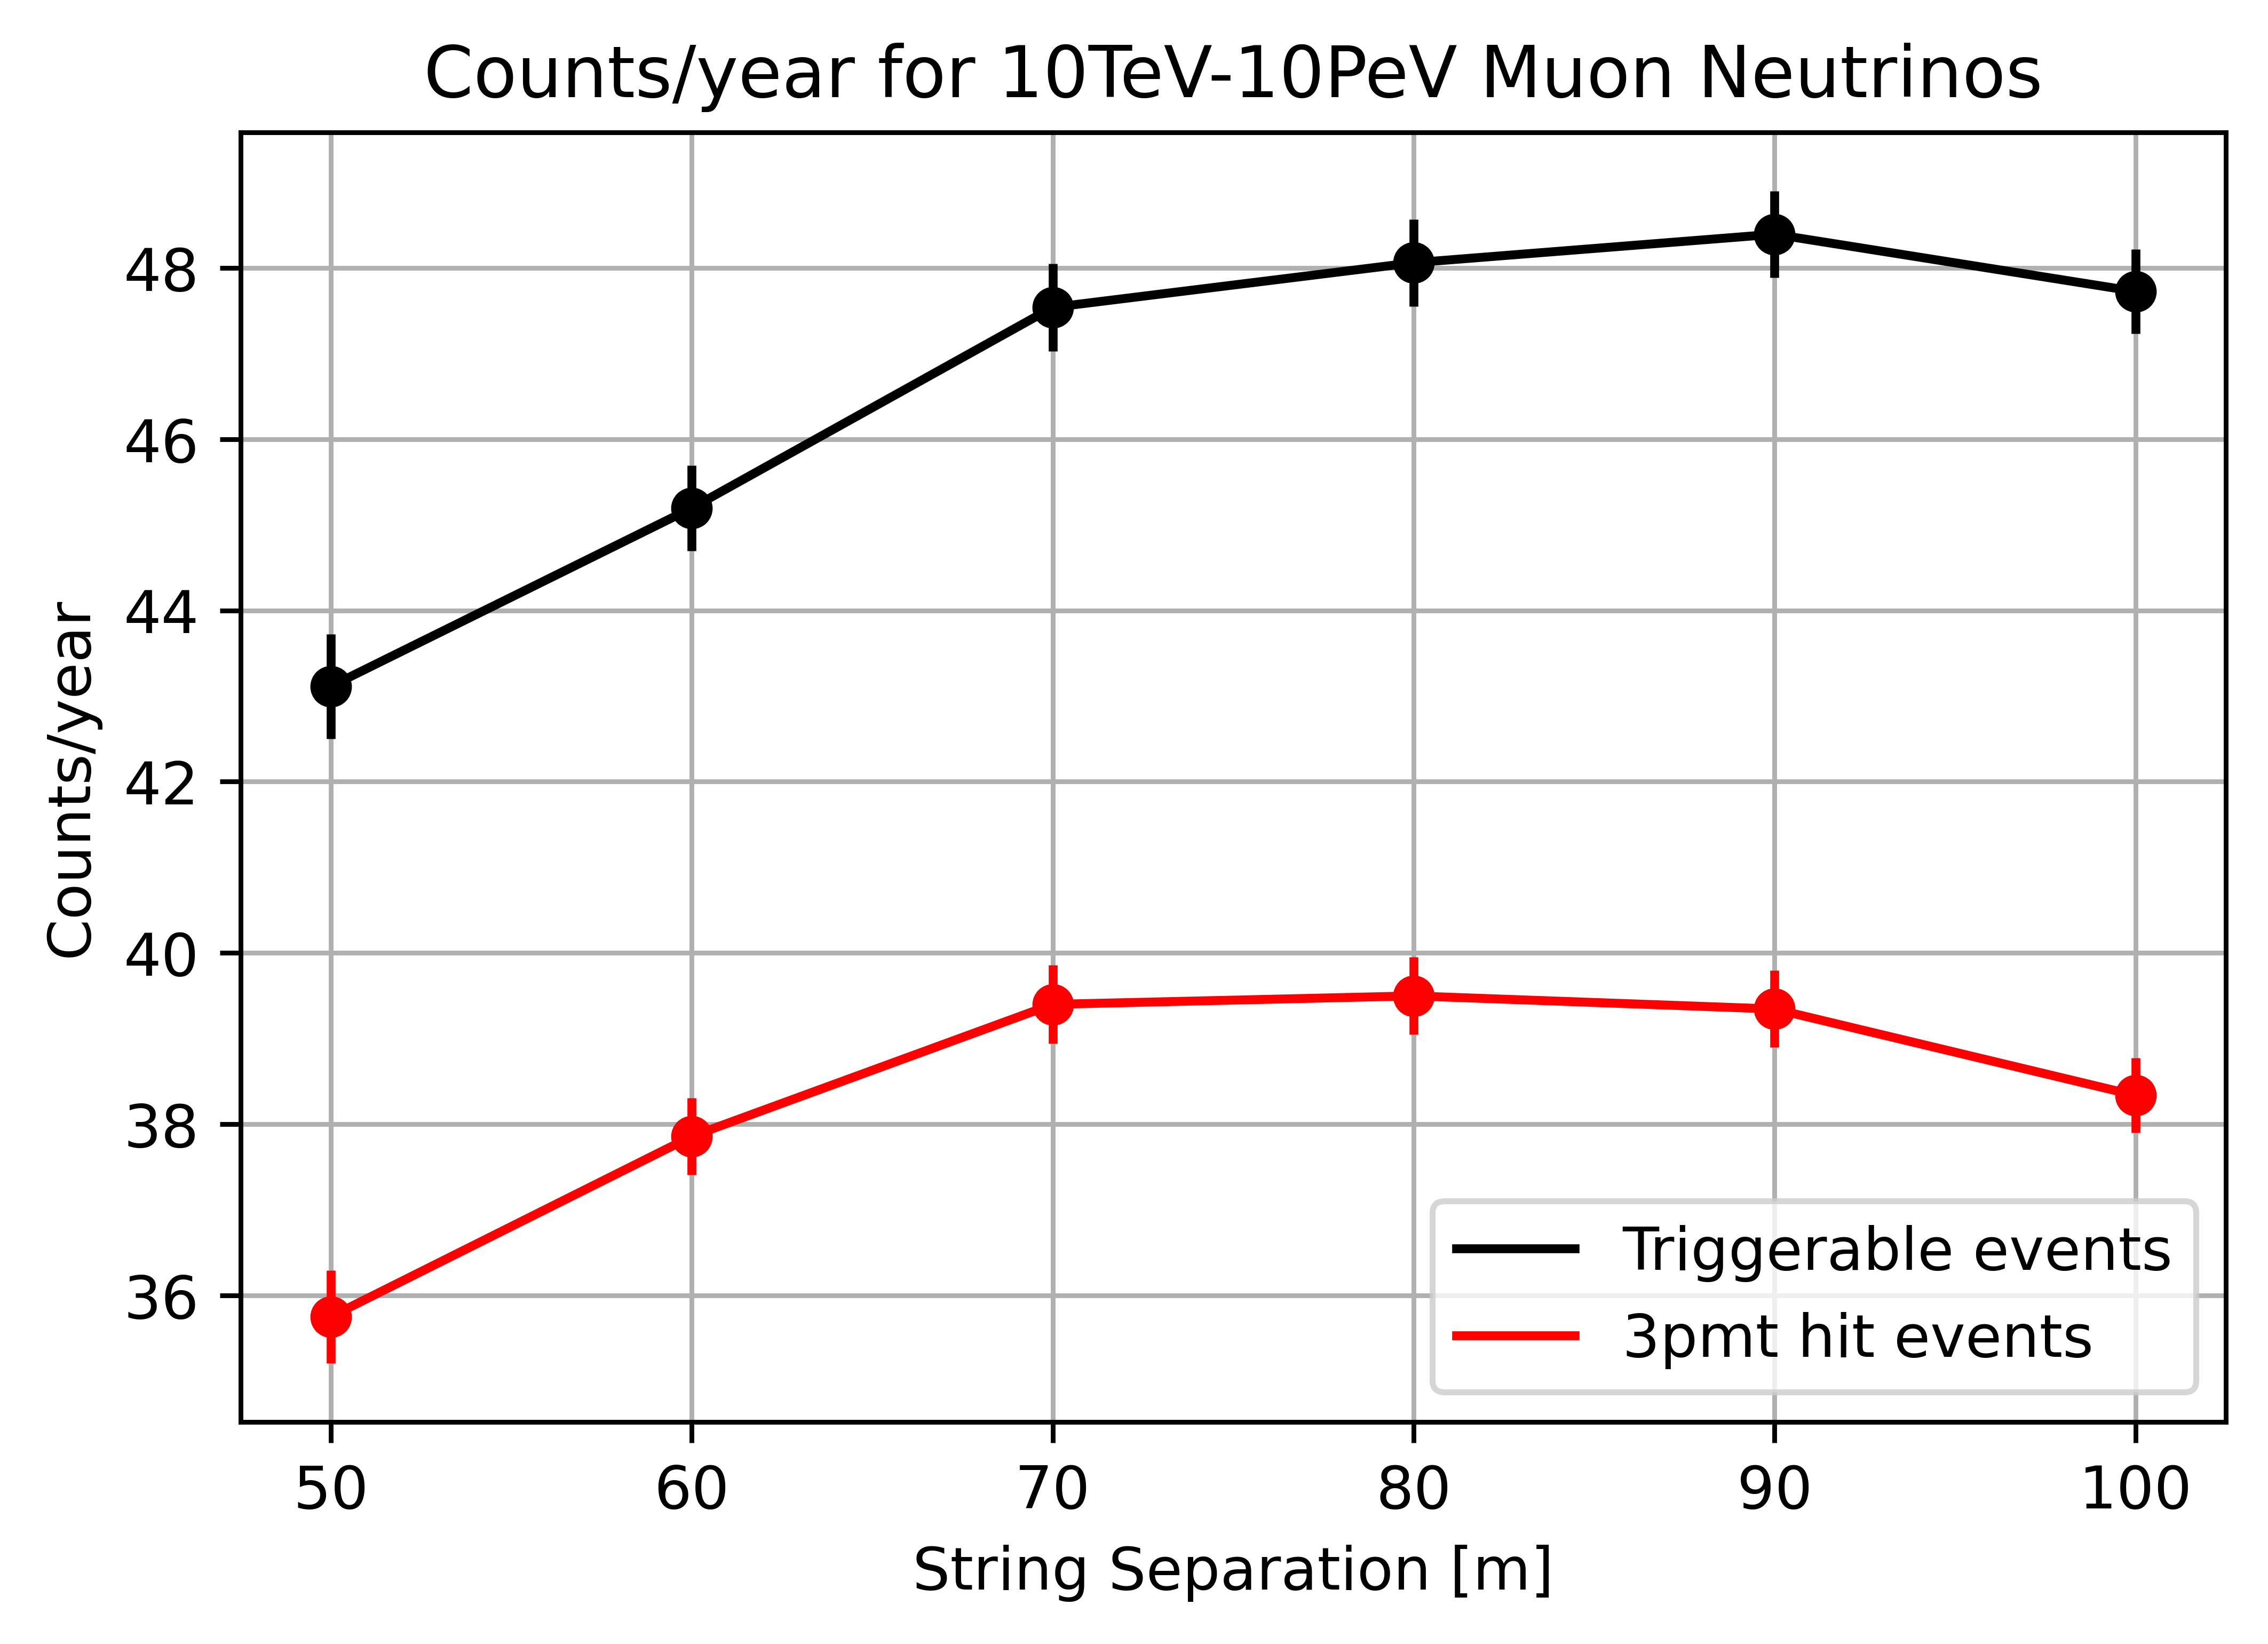

In [6]:
plt.figure(1,dpi=800)
plt.plot(['50','60','70','80','90','100'], triggerable_events,color = 'black' ,label='Triggerable events')
plt.errorbar(['50','60','70','80','90','100'], triggerable_events,yerr=triggerable_events_err, fmt='o',
             color='black')
plt.plot(['50','60','70','80','90','100'], triggered_events, color='red', label='3pmt hit events')
plt.errorbar(['50','60','70','80','90','100'], triggered_events,yerr=triggered_events_err,fmt='o',
             color = 'red')
plt.ylabel('Counts/year')
plt.xlabel('String Separation [m]')
plt.grid()
plt.legend()
plt.title('Counts/year for 10TeV-10PeV Muon Neutrinos')
plt.savefig('geometry_selection.jpg', dpi=800, bbox_inches='tight')